# <font color='purple'>**PART-B: Perform Market basket analysis using the apriori algorithm on Market_Basket_Optimisation.csv dataset.**

**1. Import the dataset using pandas.**

In [ ]:
#uploading the csv file in google colab
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving B_34_Nidhi Misra - Market_Basket_Optimisation.csv to B_34_Nidhi Misra - Market_Basket_Optimisation.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['B_34_Nidhi Misra - Market_Basket_Optimisation.csv']),header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


**2. State the number of rows and columns in the dataset. What do rows and columns represent about the dataset?**

In [ ]:
print("Rows: ",len(df))
print("Columns: ",len(df.columns))


Rows:  7501
Columns:  20


Here, the number of rows represents the number of transactions and the columns represent the maximum product purchased by some customer in one transaction.

**3. Replace all the nan values with ''**

In [ ]:
df=df.fillna('')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
2,chutney,,,,,,,,,,,,,,,,,,,
3,turkey,avocado,,,,,,,,,,,,,,,,,,
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,,,,,,,,,,,,,,,,,
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,,,,,,,,,,,,,,
7498,chicken,,,,,,,,,,,,,,,,,,,
7499,escalope,green tea,,,,,,,,,,,,,,,,,,


**4.Find the total number of unique products available.**

In [ ]:
unique_=[]
for index, row in df.iterrows():
  for product in row:
    if product not in unique_ and product!='':
      unique_.append(product)
print("Total number of unique products:",len(unique_))

**5.Represent using appropriate visualization, the unique products vs the number of times they are purchased. [Restrict to top 10 items].**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
style1={'family':'serif','color':'red','size':15}
style2={'family':'serif','color':'blue','size':12}

freq = {}
for index, row in df.iterrows():
  for product in row:
    if product=='':
      continue
    if (product in freq):
        freq[product] += 1
    else:
        freq[product] = 1
freq=dict(sorted(freq.items(), key=lambda item: item[1],reverse=True))
count=0
key_=[]
value=[]
for k,v in freq.items():
  if count==10:
    break
  count+=1
  key_.append(k)
  value.append(v)
plt.bar(key_,value])
plt.title("Unique products",loc="center",fontdict=style1)
plt.xlabel("Products",fontdict=style2)
plt.ylabel("Frequency",fontdict=style2)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

**6. Convert the data frame into a list of a list where each inner list represents a transaction. For example, all items of row 1 will be present in the first list inside the outer list.**

In [ ]:
outer_list=[]
for index,row in df.iterrows():
  inner_list=[]
  for product in row:
    if product=='':
      break
    inner_list.append(product)
  outer_list.append(inner_list)


**7. Transform the dataset for the Aprori algorithm: Encode the data such that it contains True and False / 0 and 1. The columns are the item names and rows will contain if that item is present or not.**


In [ ]:
import numpy as np
mapping = {}
for x in range(len(unique_)):
  mapping[unique_[x]] = x

one_hot_encode = []
count=-1
for col in outer_list:
  count+=1
  arr = list(np.zeros(len(unique_), dtype = int))
  for c in col:
    arr[mapping[c]] = 1
  one_hot_encode.append(arr)


**8. Find the frequent item set by applying the Aprori algorithm. [use min support as min_support=0.01]. Draw a conclusion based on the output received.**


In [ ]:
import pandas as pd    
df_plus = pd.DataFrame(one_hot_encode, columns =unique_) 
df_plus


In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df_plus,min_support=0.01,use_colnames = True).sort_values('support',ascending=False).reset_index(drop=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.179709,(eggs),1
2,0.174110,(spaghetti),1
3,0.170911,(french fries),1
4,0.163845,(chocolate),1
...,...,...,...
252,0.010265,"(cake, frozen vegetables)",2
253,0.010132,"(low fat yogurt, frozen vegetables)",2
254,0.010132,"(spaghetti, mineral water, french fries)",3
255,0.010132,"(chocolate, soup)",2


**9. Represent using appropriate visualization, a few groups of item sets with their meaning**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
item=[]
support=[]
count=0
for i in range(50):
  support.append(frequent_itemsets['support'][i])
  item.append(str(set(frequent_itemsets['itemsets'][i])))

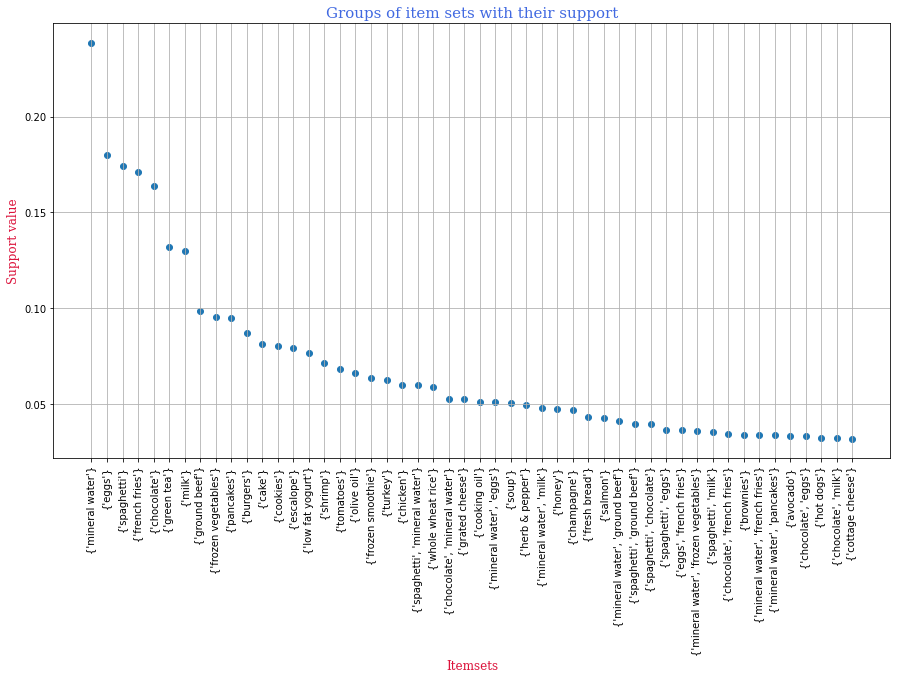

In [ ]:
fig, ax=plt.subplots(figsize=(15,8))
bar_plot=plt.scatter(item,support)
plt.xlabel('Itemsets', fontdict=style2)
plt.ylabel('Support value', fontdict=style2)
plt.title('Groups of item sets with their support', fontdict=style1)
plt.xticks(rotation=90)
plt.grid()
plt.show()



**10. Find the association rules among the items/group of items that have support greater than the min support. Use metric as "confidence" and min_threshold=0.2, and display the results sorted by lift.**


In [ ]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.2).sort_values('lift',ascending=False).reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
1,"(spaghetti, mineral water)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445
2,(tomatoes),(frozen vegetables),0.068391,0.095321,0.016131,0.235867,2.474464,0.009612,1.183930
3,(shrimp),(frozen vegetables),0.071457,0.095321,0.016664,0.233209,2.446574,0.009853,1.179825
4,"(mineral water, milk)",(frozen vegetables),0.047994,0.095321,0.011065,0.230556,2.418737,0.006490,1.175757
...,...,...,...,...,...,...,...,...,...
157,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405
158,(ground beef),(eggs),0.098254,0.179709,0.019997,0.203528,1.132539,0.002340,1.029905
159,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711
160,(green tea),(mineral water),0.132116,0.238368,0.031063,0.235116,0.986357,-0.000430,0.995748


**11. Find the various products that must be placed together to maximize the profit for the dataset specified.**


*   herb & pepper ; ground beef 
*   spaghetti ; mineral water ; ground beef	
*   mineral water ; milk ; frozen vegetables
*   tomatoes ; shrimp ; frozen vegetables





**12. Change the threshold and specify its impact.**


In [ ]:
association_rules(frequent_itemsets,metric='confidence',min_threshold=0.45).sort_values('lift',ascending=False).reset_index(drop=True)

**13. Consider some random antecedents and consequents and find if it will be good to place them nearby to increase sales.**

In [ ]:
import random
i=random.randint(0,161)
print(i)
print(set(rules['antecedents'][i]),"->",set(rules['consequents'][i]))
print("confidence: ",rules['confidence'][i])
print("Lift: ",rules['lift'][i])

31
{'soup'} -> {'mineral water'}
confidence:  0.45646437994722955
Lift:  1.9149548735929356
